In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("../arima-results.csv")
df

,Date,Value,ArimaPred
0,2010-01-01,388.91,NaN
1,2010-02-01,390.41,388.910322
2,2010-03-01,391.37,391.396034
3,2010-04-01,392.67,391.674916
4,2010-05-01,393.21,393.125008
...,...,...,...
191,2025-12-01,NaN,426.236910
192,2026-01-01,NaN,427.130526
193,2026-02-01,NaN,427.756195
194,2026-03-01,NaN,428.593612


In [14]:
def plotTimeSeries(df, valueCol='Value', otherCols=None, title='CO2 Levels Over Time'):
    """    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    plt.figure(figsize=(14, 6))
    
    # main value column
    plt.plot(df['Date'], df[valueCol], color='royalblue', linewidth=2, label=f'Actual {valueCol}')
    
    # plot other columns
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in df.columns:
            plt.plot(df['Date'], df[col], color=colors[i], linewidth=2, 
                     linestyle='--', label=f'{col}')
    
    # add vertical line at last actual data point
    lastActualDate = df[~df[valueCol].isna()]['Date'].max()
    plt.axvline(x=lastActualDate, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualDate, df[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.ylabel('CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt


In [15]:
def plotYearlyAvg(df, valueCol='Value', otherCols=None, title='Annual CO2 Levels'):
    """
    plot yearly average CO2 levels with support for multiple data columns
    
    params:
        df: dataframe with the data
        valueCol: name of the main value column
        otherCols: list of other columns to plot
        title: plot title
    """
    dfCopy = df.copy()
    dfCopy['Year'] = pd.to_datetime(dfCopy['Date']).dt.year
    
    # prepare aggregation dictionary
    aggDict = {valueCol: 'mean'}
    for col in otherCols:
        if col in dfCopy.columns:
            aggDict[col] = 'mean'
    
    yearlyData = dfCopy.groupby('Year').agg(aggDict).reset_index()
    
    lastActualYear = dfCopy[~dfCopy[valueCol].isna()]['Year'].max()
    
    plt.figure(figsize=(14, 6))
    
    plt.plot(yearlyData['Year'], yearlyData[valueCol], 
             marker='o', color='royalblue', linewidth=2, 
             label=f'Actual {valueCol}')
    
    # plot other columns with different colors
    colors = sns.color_palette("Set2", len(otherCols))
    for i, col in enumerate(otherCols):
        if col in yearlyData.columns:
            plt.plot(yearlyData['Year'], yearlyData[col], 
                     marker='x', linestyle='--', color=colors[i], 
                     linewidth=2, label=f'{col}')
    
    # vertical line to indicate prediction boundary
    plt.axvline(x=lastActualYear, color='gray', linestyle='--', alpha=0.7)
    plt.text(lastActualYear, yearlyData[valueCol].max(), ' Predictions →', verticalalignment='top')
    
    plt.title(title, fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average CO2 (ppm)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    return plt

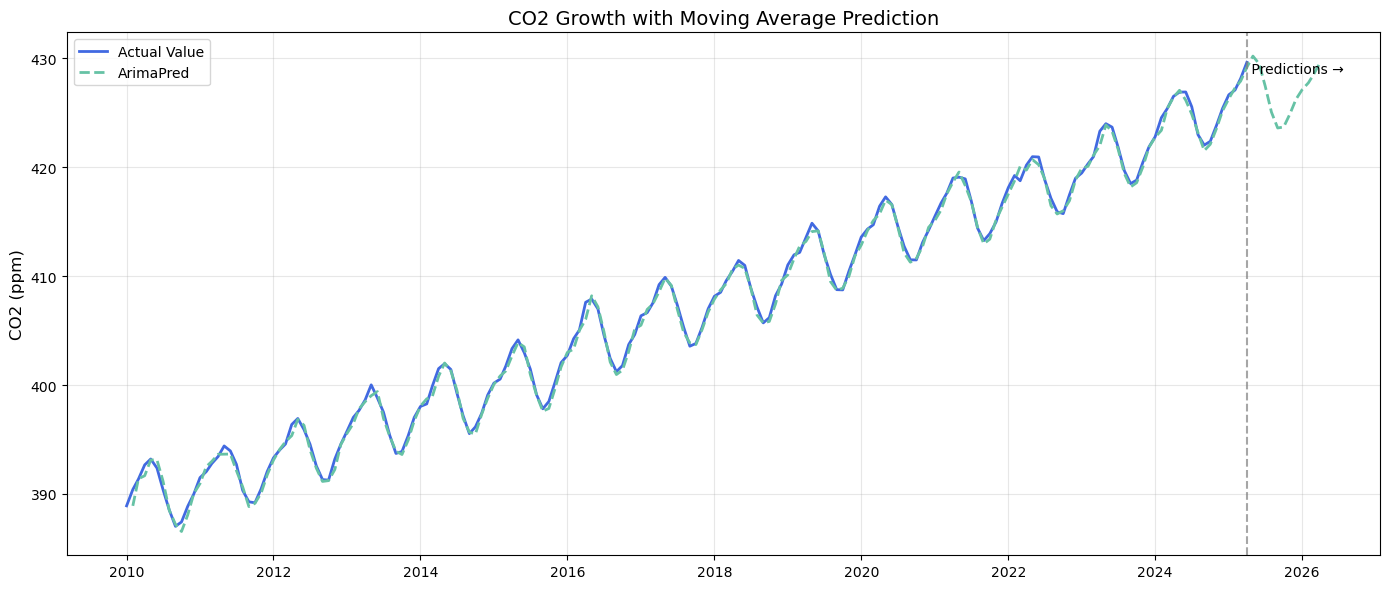

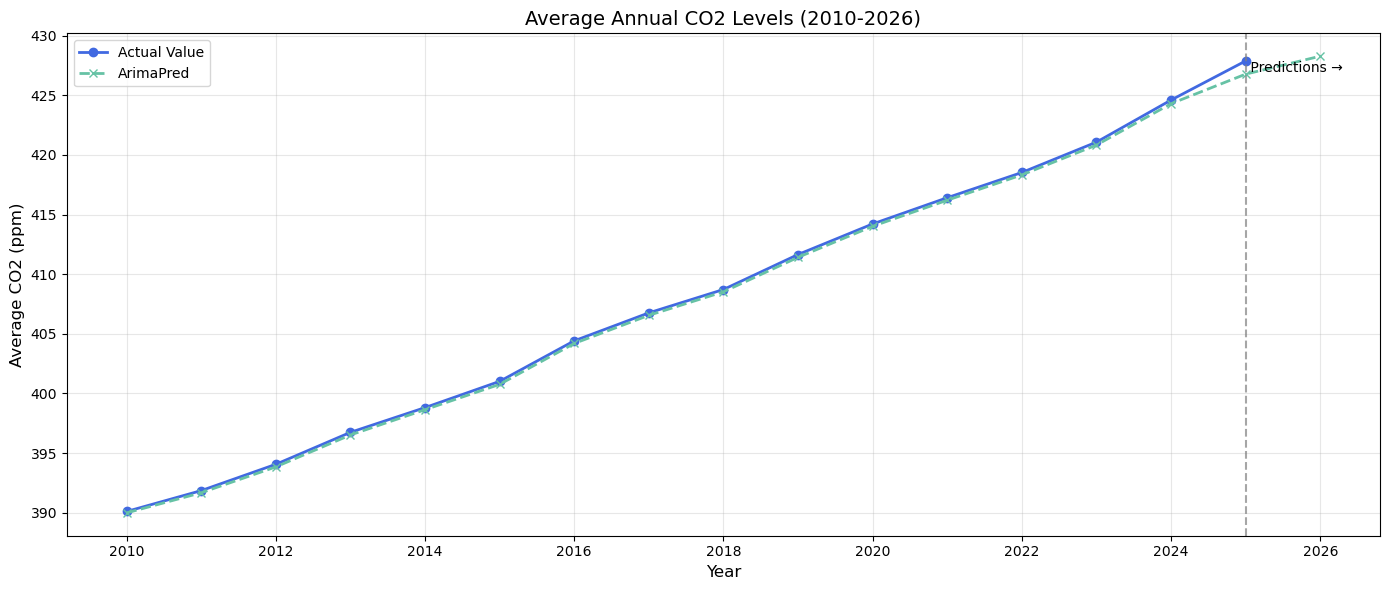

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

# colsName = ['MovingAvg', 'RMA_Pred', 'PercAvg_Pred', 'ExpSmooth', 'MonteCarlo_Pred']

colsName = ['ArimaPred']
dir = '../plots/individual/'
methodName = 'ARIMA-OPT'

plotTimeSeries(df, otherCols=colsName, title='CO2 Growth with Moving Average Prediction')
plt.savefig(f'{dir}{methodName}_CO2_growth.png')
plt.show()



df['Date'] = pd.to_datetime(df['Date'])
yearlyPlot = plotYearlyAvg(df, otherCols=colsName, title='Average Annual CO2 Levels (2010-2026)')
plt.savefig(f'{dir}{methodName}_yearly_trend_avg.png')
plt.show()